# Variables

- Memory References
    - What are variables?
- Memory management
    - Reference Counting
    - Garbage Collection
- Dynamic vs Static Typing
- Mutability and Immutability
- Shared References
- Variable Equality
- Everything is an Object




### Variables are Memory References

- Memory is stored on an address 
- Objects are stored on memory with an address
- Objects can be stored on memories spanning different slots
    - Overflow over several slots
- Python has a memory manager called Pythong Memory Management


- Variable names in Python are references to the object stored at an address
- In python the id() function returns the memory address
    - id() returns a base 10 number
    - hex(id(a))

In [36]:
my_var = 10
print(my_var)
print('The memory address is {0}'.format(id(my_var)))
print('The memory address in HEX notation is {}'.format(hex(id(my_var))))

10
The memory address is 1736338784
The memory address in HEX notation is 0x677e6d60


In [37]:
greeting = 'hello'
print(greeting)
print(id(greeting))
print(hex(id(greeting)))

hello
1934614296984
0x1c26fff7998


### Reference Counting

- Counting references that are pointing to the same object
![title](img/references.PNG)
 
 - The reference count in Python can be found as follows:
     - sys.getrefcount(my_var)
         - This will return the count + 1 as a result of refering to it again by calling
     - ctypes.c_long.from_address(address).value

In [38]:
import sys 
a = [1, 2, 3]
print(id(a))
print(sys.getrefcount(a))

1934613306376
2


In [39]:
import ctypes
def ref_count(address: int):
    return ctypes.c_long.from_address(address).value

print('The reference count is {}'.format(ref_count(id(a))))

The reference count is 1


In [40]:
b = a
print(ref_count(id(b)))
print(ref_count(id(a)))


2
2


In [41]:
c = a
ref_count(id(a))

3

In [42]:
b = None
c = None
ref_count(id(a))

1

### Garbage Collection

- Python keeps track of the references we have to an object
    - As soon as the reference count of an object is zero, python's memory manager then destroys that object and reclaims the memory

- Garbage collector looks for circular memories and reclaims memory and avoid memory leakage
    
The following is a representation of a circular reference:
    ![title](img/circular-references.PNG)

- You can turn off garbage collector but you need to make sure that there are no circular references in your code! 
    - Sometimes it is necessary to turn off garbage collector for performance reasons
 
 - Garbage collector does not always work

In [43]:
import ctypes 
import gc # Garbage collection module

def ref_count(address: int):
    return ctypes.c_long.from_address(address).value

In [44]:
def object_by_id(object_id):
    for obj in gc.get_objects():
        if id(obj) == object_id:
            return 'Object Exists!'
    return 'Not Found!'

#### Circular References

In [45]:
class A:
    def __init__(self):
        self.b = B(self)
        print('A: self: {0}, b: {1}'.format(hex(id(self)), hex(id(self.b))))        

In [46]:
class B:
    def __init__(self, a):
        self.a = a
        print('B: self: {0}, a: {1}'.format(hex(id(self)), hex(id(self.a))))        

In [47]:
# Disable garbage collector
gc.disable()

In [48]:
my_var = A()

B: self: 0x1c2700020b8, a: 0x1c270002198
A: self: 0x1c270002198, b: 0x1c2700020b8


In [49]:
hex(id(my_var))

'0x1c270002198'

In [50]:
print(hex(id(my_var.b)))
print(hex(id(my_var.b.a)))

0x1c2700020b8
0x1c270002198


In [51]:
a_id = id(my_var)
b_id = id(my_var.b)

In [52]:
print(hex(a_id))
print(hex(b_id))

0x1c270002198
0x1c2700020b8


In [53]:
ref_count(a_id)

2

In [54]:
ref_count(b_id)

1

In [55]:
object_by_id(a_id)

'Object Exists!'

In [56]:
object_by_id(b_id)

'Object Exists!'

In [57]:
my_var = None

In [58]:
ref_count(a_id)

1

In [59]:
ref_count(b_id)

1

In [60]:
print(object_by_id(a_id))
object_by_id(b_id)

Object Exists!


'Object Exists!'

In [61]:
gc.collect() # Running the gc mannualy

92

In [62]:
print(object_by_id(a_id))
print(object_by_id(b_id))

Not Found!
Not Found!


In [63]:
print(ref_count(a_id))
print(ref_count(b_id))

1
1


### Dynamic Typing vs Static Typing

- Many languages are statically typed
    - This means data types are usually with variable names
    - Variables are associated with data types
- Python is dynamically typed
    - Variables are nothing but references to objects

![title](img/dynamic-type.PNG)

In [64]:
a = 'hello'
print(type(a))
a = 10
print(type(a))
a = lambda x: x**2
print(type(a))

<class 'str'>
<class 'int'>
<class 'function'>


### Variable Re-Assignment


- When the variable name to a reference is changed, the object itself remains unchanged
- The object that is being referenced remains unaffected even if the reference itself is gone

- Python first looks at the right hand side of an assignment before changing variable references

In [65]:
var = 2
id_1 = id(var)
var = var + 2
id_2 = id(var)
print('The object is not changed because id_1 is not the same as id_2')
print(id_1 == id_2)

The object is not changed because id_1 is not the same as id_2
False


In [66]:
a = 10
b = 10

hex(id(a)) == hex(id(b))

True

### Object Mutability

- When we say the object has mutated we mean to say that the internal data has changed
- An object whose internal state can be changed is called mutable and immutable when it cannot
- Immutable objects
    - Numbers (int, float, Booleans, etc) (Look above) id(a) == id(b) --> True
    - Strings
    - Tuples
    - Frozen Sets
    - User-Defined Classes can also be immutable
    
- Mutable objects
    - Lists
    - Sets
    - Dictionaries
    - User-Defined Classes



# Function Arguments and Mutability

- Immutable objects are generally safe from uninteded side-effects
- See image below


![title](img/safety-immutability.PNG)

- Difference between Scopes
    - Module Scope - module scope
    - Process Scope - process() scope

- In order to maintain an object, the nature of its mutability has to be taken into account
- Objects
    - Mutable
        - List
        - Set
        - dict
    - Immutable
        - String
        - Tuple
        - bool
        - int
        - float
        - frozenset

In [67]:
def process(s):
    print('Initial s # = {0}'.format(id(s)))
    s = s + ' world'
    print('Final s # = {0}'.format(id(s)))

In [68]:
my_var = 'hello'
print('my_var # = {0}'.format(id(my_var)))
process(my_var)

my_var # = 1934614296984
Initial s # = 1934614296984
Final s # = 1934604553072


In [69]:
def process_2(list_object):
    print('Initial List # = {0}'.format(id(list_object)))
    list_object.append(1000)
    print('Final List # = {0}'.format(id(list_object)))

In [70]:
my_list = [1, 2, 3]
print('My List # = {0}'.format(id(my_list)))
process_2(my_list)

My List # = 1934604565768
Initial List # = 1934604565768
Final List # = 1934604565768


In [71]:
def process_3(tuple_object):
    print('Initial Tuple # = {0}'.format(id(tuple_object)))
    tuple_object[0].append(1000)
    print('Final Tuple # = {0}'.format(id(tuple_object)))

In [72]:
my_tuple = ([1,2,3], 'string')
print('My List in Tuple # = {0}'.format(id(my_tuple[0])))
process_3(my_tuple)
print('My List in Tuple After # = {0}'.format(id(my_tuple[0])))

My List in Tuple # = 1934604555080
Initial Tuple # = 1934604310664
Final Tuple # = 1934604310664
My List in Tuple After # = 1934604555080


# Shared References and Mutability

- Shared reference is the concept of two variables referencing the same object in memory
- Python's memory manager decides to automatically re-use memory references
- Is it safe?
    - Yes -> when the objects being referenced are immutable
    - Not so much -> when the objects being referenced are mutable

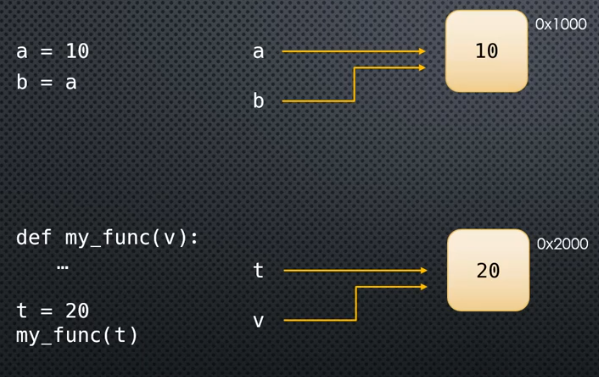

- Shared references are important to keep in mind
    - Everything in python is referenced (object oriented)
        - Everything is an object

In [73]:
a = [1, 2, 3]
b = a

In [74]:
b.append('CHANGED!')
print(a)

[1, 2, 3, 'CHANGED!']


In [75]:
a = 'hello'
b = 'hello'
print(hex(id(a)) == hex(id(b)))
b = 'hello world!'
print(hex(id(a)) == hex(id(b)))

True
False


In [76]:
a = 10
b = 10
print(hex(id(a)) == hex(id(b)))
a = 1500
b = 1500
print(hex(id(a)) == hex(id(b)))
print("Reference manager does not always reference the objects the same way!")

True
False
Reference manager does not always reference the objects the same way!


# Variable Equality

- Variable equality can be thought of in two fundamental ways
    - Memory Address
        - var_1 **is** var_2
            - var_1 is not var_2
            - not(var_1 is var_2)
        - This operator compares memory addresses
    - Object State (data)
        - var_1 **==** var_2
            - var_1 != var_2
            - not(var_1 == var_2)
        - This will check of the **contents** of var_1 and var_2 are equal

- We can test if a variable is empty by comparing it to None
    - var_1 is None
- None is an object

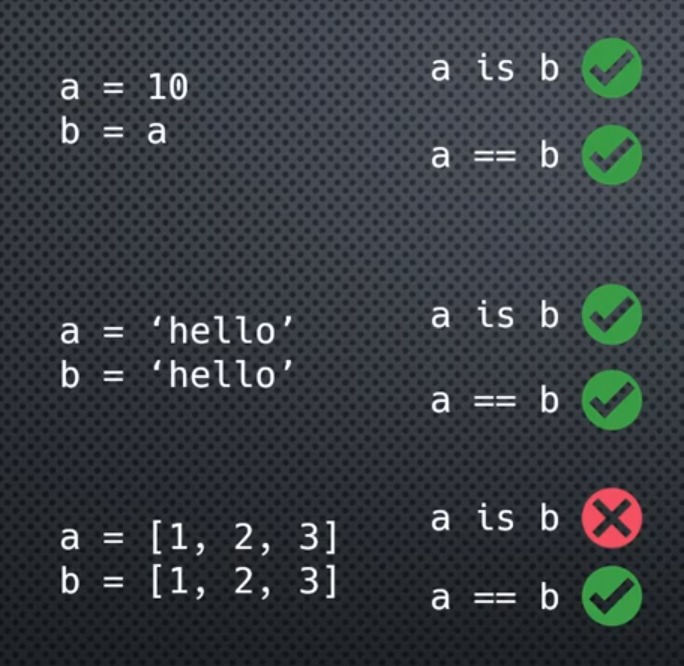

In [77]:
a = 10
b = 10
print(a is b)
print(a == b)
print('\n')
a = 500
b = 500
print(a is b)
print(a == b)
print('\n')
a = [1, 2, 3]
b = [1, 2, 3]
print(a is b)
print(a == b)
print('\n')
a = 10
b = 10.0
print(a is b)
print(a == b)
print('\n')

True
True


False
True


False
True


False
True




In [78]:
print(id(None))
print(type(None))

1735894160
<class 'NoneType'>


In [79]:
a = None
b = None
c = None

print('They are all refereing to the same address: ', a is b is c)

They are all refereing to the same address:  True


# Everything is an Object in python

- There are many data types in python
    - int
    - bool
    - dict
    - ...
- There are also other constructs
    - +, -, ==, is, ...
    - Functions
    - Classes
    - Types

- What do they all have in common?
    - They are all objects meaning that they are all instances
        - A class is an instance of Class
    - This means they all have a memory address
    
- Any object 
    - can be assigned to a variable
    - can be passed to a function
    - can be returned from a function

- Functions
    - my_func -> name of the function
    - my_func() -> invoking the function

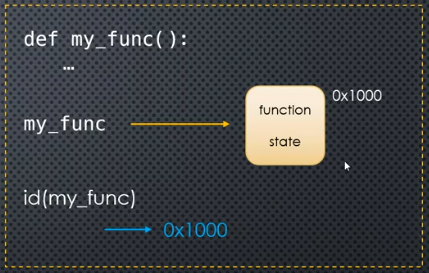

In [80]:
a = 10
print(type(a))
b = int(10)
print(type(b))
print(int())

<class 'int'>
<class 'int'>
0


In [81]:
# help(int)
c = int('101', base=2)
print(c)

5


In [82]:
def square(a):
    return a**2

print(type(square))

f = square
print(id(square))
print(id(f))
print(f is square)
print('\n')
print(f(2))

<class 'function'>
1934614448464
1934614448464
True


4


In [83]:
def cube(a):
    return a**3

def select_function(fn_id):
    if fn_id == 1:
        return square
    else:
        return cube

In [84]:
f = select_function(1)
print(f is square)

True


In [85]:
f = select_function(2)
print(f(2))
print(select_function(2)(3))

8
27


In [86]:
def exec_func(fn,n):
    return fn(n)

print(exec_func(cube, 3))

27


# Python Optimizations: Interning

- Why didn't a = 500 and b = 500 point to the same memory address?
    - Interning
- Interning is reusing objects on-demand
    - CPython pre-loads (caches) a global list of integers
        - range [-5, 256]
        - Singletons
- Pre caching is an optmization strategy for small integers that show up often

In [87]:
a = 10
b = 10
print(a is b)
print('\n')

a = 257
b = 257
print(a is b)
print('\n')
print('The range of Interning is [-5, 256]')

True


False


The range of Interning is [-5, 256]


# Python Optimizations: String Interning


- As python code is compiled, identifiers are interned (things not starting with a number)
    - variable names
    - function names
    - class names
- **Some** Strings get interned but not all
- This is done for optimization purposes
- You can force strings to be interned
    - sys.intern()
    - This might be used to reduce memory overhead
    - Help speed up comparisons by using is operator
- When you are doing a large amount of string comparisons manual interning might result in a faster result

In [88]:
a = 'hello'
b = 'hello'
print(id(a), id(b))
print('a and b are interned, ', a is b)

1934614296984 1934614296984
a and b are interned,  True


In [89]:
a = 'hello world'
b = 'hello world'
print(id(a), id(b))
print('a and b are not interned, ', a is b)

1934604506928 1934604524208
a and b are not interned,  False


In [90]:
a = '_this_is_a_long_string_that_could_be_used_as_an_identfier'
b = '_this_is_a_long_string_that_could_be_used_as_an_identfier'
print('As long as they are identifiers, a and be will be interned, ', a is b)

As long as they are identifiers, a and be will be interned,  True


In [91]:
import sys
a = sys.intern('hello world')
b = sys.intern('hello world')
c = 'hello world'

In [92]:
print('Since a and b are manually interned they will be based from the same address: ' ,id(a) == id(b))
print('However, c is not interned: ', id(a) == id(b) == id(c))

Since a and b are manually interned they will be based from the same address:  True
However, c is not interned:  False


In [93]:
def compare_using_equals(n):
    a = 'a long string that is not interned' * 200
    b = 'a long string that is not interned' * 200
    
    for i in range(n):
        if a == b:
            pass

In [94]:
def compare_using_interning(n):
    a = sys.intern('a long string that is not interned' * 200)
    b = sys.intern('a long string that is not interned' * 200)
    
    for i in range(n):
        if a is b:
            pass

In [95]:
import time

start = time.perf_counter()
compare_using_equals(10000000)
end = time.perf_counter()
print('Equality comparison: ', end - start)

start = time.perf_counter()
compare_using_interning(10000000)
end = time.perf_counter()
print('Interning comparison: ', end - start)

Equality comparison:  3.254718094646705
Interning comparison:  0.3295032625737804


# Python Optmization: Peephole

- This kind of optimization occur at compile time
- Certain things get optimized
    - Constant expressions
        - Numeric calculations
            - ex. 24 * 60 -> 1440
            - This is done automatically by python
        - Short sequences length < 20
            - (1, 2) * 5 -> (1, 2, 1, 2...)
            - 'abc' * 3 -> abcabcabc
            - 'hello' + ' world' -> hello world
- Membership tests
    - if e in [1, 2, 3] is encountered
    - python will replace [1, 2, 3] by its immutable counterpart
        - (1, 2, 3) -> tuple
    - Immutable objects are better for optimization because they allow faster comparisons

    - Lists -> Tuples
    - Sets -> frozenset 
- Set membership is much faster than list or tuple membership
    - Instead of writing if e in [1, 2, 3]: write instead
        - if e in {1, 2, 3}:
    - See implementation below

In [96]:
def my_func():
    a = 24 * 60
    b = (1, 2) * 5
    c = 'abc' * 3
    d = 'ab' * 11
    e = 'the quick brown fox' * 5
    f = ['a', 'b'] * 3
    
my_func.__code__.co_consts

(None,
 24,
 60,
 1,
 2,
 5,
 'abc',
 3,
 'ab',
 11,
 'the quick brown fox',
 'a',
 'b',
 1440,
 (1, 2),
 (1, 2, 1, 2, 1, 2, 1, 2, 1, 2),
 'abcabcabc')

In [97]:
def my_func(e):
    if e in [1, 2, 3]:
        pass
    
my_func.__code__.co_consts

(None, 1, 2, 3, (1, 2, 3))

In [98]:
def my_func(e):
    if e in {1, 2, 3}:
        pass
    
my_func.__code__.co_consts

(None, 1, 2, 3, frozenset({1, 2, 3}))

In [99]:
import string
import time

In [100]:
char_list = list(string.ascii_letters)
char_tuple = list(string.ascii_letters)
char_set = set(string.ascii_letters)

def membership_test(n, container):
    for i in range(n):
        if 'z' in container:
            pass

start = time.perf_counter()
membership_test(10000000, char_list)
end = time.perf_counter()
print('list: ', end - start)

start = time.perf_counter()
membership_test(10000000, char_tuple)
end = time.perf_counter()
print('tuple: ', end - start)

start = time.perf_counter()
membership_test(10000000, char_set)
end = time.perf_counter()
print('set: ', end - start)

list:  4.2854159663829705
tuple:  4.183880174722617
set:  0.4143365929135143
